In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
ins = sqlalchemy.inspect(engine)

In [11]:

measurement_columns = ins.get_columns('measurement')
for column in measurement_columns:
	print(column['name'], column['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
# Find the most recent date in the data set.
most_recent_date_query = session.query(func.max(measurement.date))
most_recent_date = ''
for row in most_recent_date_query:
	most_recent_date = row[0]
	print(row)

('2017-08-23',)


In [13]:
test_query = session.query(measurement).filter(measurement.date <= '2012-01-01').all()
for row in test_query:
    row_values = [getattr(row, column) for column in row.__table__.columns.keys()]
    print(row_values)
"""for measure in test_query:
	print(measure.__dict__)"""

[1, 'USC00519397', '2010-01-01', 0.08, 65.0]
[2, 'USC00519397', '2010-01-02', 0.0, 63.0]
[3, 'USC00519397', '2010-01-03', 0.0, 74.0]
[4, 'USC00519397', '2010-01-04', 0.0, 76.0]
[5, 'USC00519397', '2010-01-06', None, 73.0]
[6, 'USC00519397', '2010-01-07', 0.06, 70.0]
[7, 'USC00519397', '2010-01-08', 0.0, 64.0]
[8, 'USC00519397', '2010-01-09', 0.0, 68.0]
[9, 'USC00519397', '2010-01-10', 0.0, 73.0]
[10, 'USC00519397', '2010-01-11', 0.01, 64.0]
[11, 'USC00519397', '2010-01-12', 0.0, 61.0]
[12, 'USC00519397', '2010-01-14', 0.0, 66.0]
[13, 'USC00519397', '2010-01-15', 0.0, 65.0]
[14, 'USC00519397', '2010-01-16', 0.0, 68.0]
[15, 'USC00519397', '2010-01-17', 0.0, 64.0]
[16, 'USC00519397', '2010-01-18', 0.0, 72.0]
[17, 'USC00519397', '2010-01-19', 0.0, 66.0]
[18, 'USC00519397', '2010-01-20', 0.0, 66.0]
[19, 'USC00519397', '2010-01-21', 0.0, 69.0]
[20, 'USC00519397', '2010-01-22', 0.0, 67.0]
[21, 'USC00519397', '2010-01-23', 0.0, 67.0]
[22, 'USC00519397', '2010-01-24', 0.01, 71.0]
[23, 'USC00519

'for measure in test_query:\n\tprint(measure.__dict__)'

In [14]:
m_r_d_actual = dt.date.fromisoformat(most_recent_date)
print(m_r_d_actual)

2017-08-23


In [15]:
test_date = m_r_d_actual.replace(year=m_r_d_actual.year-1).isoformat()
(m_r_d_actual, test_date)

(datetime.date(2017, 8, 23), '2016-08-23')

In [16]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
m_r_d_actual = dt.date.fromisoformat(most_recent_date)
# Calculate the date one year from the last date in data set.
query_date_range = m_r_d_actual.replace(year=m_r_d_actual.year-1).isoformat()

# Perform a query to retrieve the data and precipitation scores
prcp_query = session.query(measurement.date, measurement.prcp).filter(measurement.date >= query_date_range)
for row in prcp_query:
    print(row)

('2016-08-23', 0.0)
('2016-08-24', 0.08)
('2016-08-25', 0.08)
('2016-08-26', 0.0)
('2016-08-27', 0.0)
('2016-08-28', 0.01)
('2016-08-29', 0.0)
('2016-08-30', 0.0)
('2016-08-31', 0.13)
('2016-09-01', 0.0)
('2016-09-02', 0.0)
('2016-09-03', 0.0)
('2016-09-04', 0.03)
('2016-09-05', None)
('2016-09-06', None)
('2016-09-07', 0.05)
('2016-09-08', 0.0)
('2016-09-09', 0.03)
('2016-09-10', 0.0)
('2016-09-11', 0.05)
('2016-09-12', 0.0)
('2016-09-13', 0.02)
('2016-09-14', 1.32)
('2016-09-15', 0.42)
('2016-09-16', 0.06)
('2016-09-17', 0.05)
('2016-09-18', 0.0)
('2016-09-19', 0.0)
('2016-09-20', 0.0)
('2016-09-21', 0.0)
('2016-09-22', 0.02)
('2016-09-23', 0.0)
('2016-09-24', 0.0)
('2016-09-25', 0.0)
('2016-09-26', 0.06)
('2016-09-27', 0.02)
('2016-09-28', 0.0)
('2016-09-29', 0.0)
('2016-09-30', 0.0)
('2016-10-01', 0.0)
('2016-10-02', 0.0)
('2016-10-03', 0.0)
('2016-10-04', 0.0)
('2016-10-05', 0.0)
('2016-10-06', 0.0)
('2016-10-07', 0.0)
('2016-10-08', 0.0)
('2016-10-09', 0.0)
('2016-10-10', 0.0)
('

In [78]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_data = pd.read_sql(prcp_query.statement, engine).rename(columns={'date': 'Date', 'prcp': 'Precipitation'}).dropna(how='any')

# Sort the dataframe by date
prcp_data = prcp_data.sort_values(by="Date")
prcp_data


,Date,Precipitation
0,2016-08-23,0.00
1192,2016-08-23,0.02
704,2016-08-23,0.05
1881,2016-08-23,0.70
361,2016-08-23,0.15
...,...,...
2228,2017-08-22,0.50
360,2017-08-23,0.00
1528,2017-08-23,0.08
1008,2017-08-23,0.00


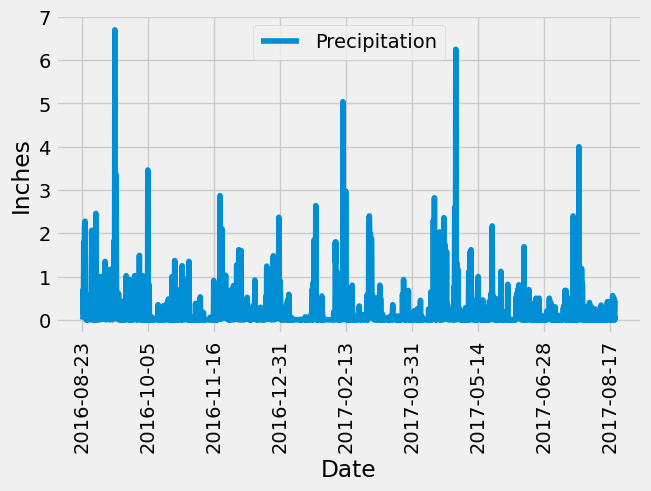

In [79]:
# Use Pandas Plotting with Matplotlib to plot the data
plot = prcp_data.plot(x='Date', y='Precipitation', xlabel='Date', ylabel='Inches',legend=True, rot=90)

In [55]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_data.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset


[(9,)]

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 4.183333333333314, 'Temperature')

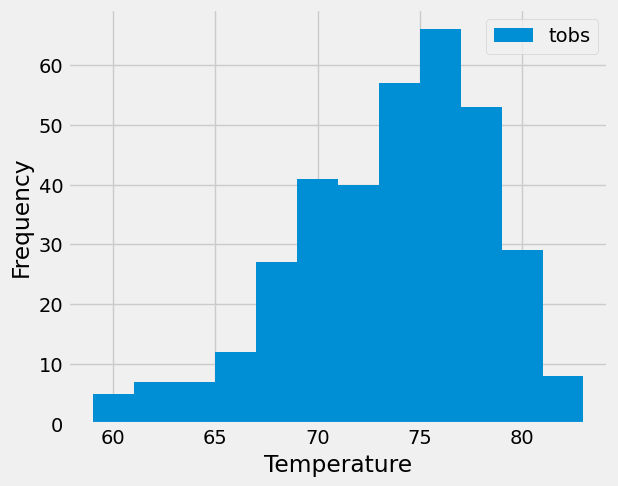

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [16]:
# Close Session
session.close()